

# Análisis Completo de Regresión Lineal

Este notebook muestra paso a paso cómo realizar un análisis de **Regresión Lineal** empleando un conjunto de datos que contiene:
- **valuationdate**: fecha de valoración (opcional para el modelo)
- **revenues**: ingresos
- **ebit**: utilidad antes de intereses e impuestos
- **depreciation**: depreciación
- **capex**: gastos de capital
- **ncwc**: cambio en capital de trabajo neto
- **bv**: (posiblemente) valor en libros
- **y**: variable objetivo que deseamos predecir (por ejemplo, un valor financiero o de valoración)

Iremos desde la **carga** y **exploración** del dataset hasta la **interpretación** de coeficientes y la **evaluación** de métricas importantes.

In [1]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv

--2025-03-06 00:20:58--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv [following]
--2025-03-06 00:20:58--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82415 (80K) [text/plain]
Saving to: ‘enterprise.csv’

enterprise.csv      100%[==============

## Paso 0: Importar librerías y configuración

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

## Paso 1: Carga y Exploración de Datos (EDA)

En este primer bloque, cargaremos nuestro dataset y realizaremos un Análisis Exploratorio básico.

In [4]:
df = pd.read_csv('enterprise.csv')
df.head()

,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,86470.7000,10387.500000,6429.000,3512.000,16848.90000,47945.100,91760.80000
1,31/12/2010,84754.2000,14031.180800,8658.600,17172.500,12095.10000,66804.400,184461.70000
2,30/09/2016,15653.4800,221.347452,647.239,749.478,1468.42800,10128.726,23323.68520
3,30/09/2018,62001.3297,7551.761957,1808.830,2702.850,11873.25464,27144.930,130202.79240
4,30/09/2014,1242.8300,497.141501,232.027,1552.908,149.97100,1463.052,11472.12267


### Estadísticas Descriptivas y Distribuciones

           revenues           ebit   depreciation          capex  \
count  1.061000e+03    1061.000000    1061.000000    1061.000000   
mean   1.632727e+05   24076.406810    8002.050367   10961.602205   
std    2.213828e+05   31871.076559   13898.135849   20250.735197   
min    8.560000e+01  -29982.979880      -5.690000    -694.661000   
25%    4.265958e+04    4522.900000     999.340000    1666.600000   
50%    1.082011e+05   12224.611950    3446.250000    4949.447000   
75%    1.862485e+05   32228.941870    8361.220000   11201.479000   
max    2.586712e+06  289541.300000  128993.500000  205525.700000   

                ncwc            bv             y  
count    1061.000000  1.061000e+03  1.061000e+03  
mean    22324.130946  8.057162e+04  3.292238e+05  
std     54636.421540  1.043500e+05  4.056701e+05  
min   -118819.899000 -1.503965e+04  3.692000e+02  
25%      3115.247000  1.689500e+04  6.981010e+04  
50%     10736.200000  4.172290e+04  1.850416e+05  
75%     23454.185000  1.147563

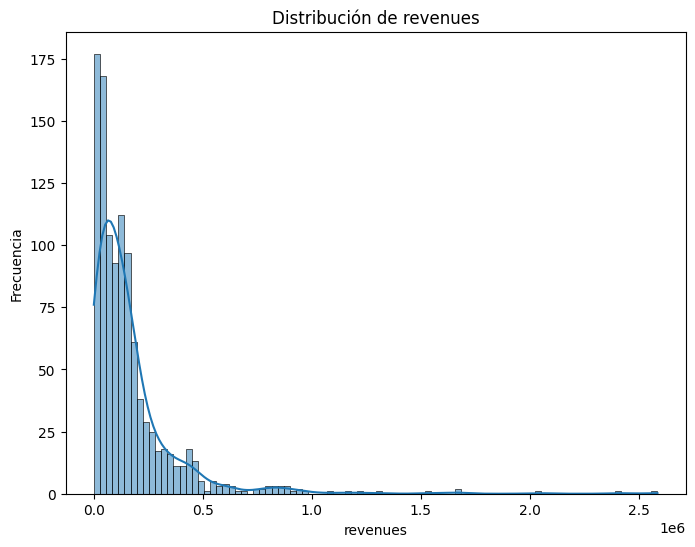

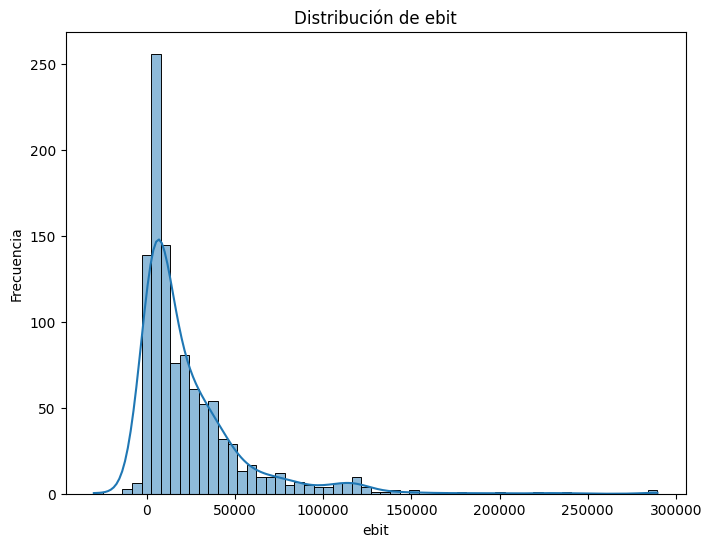

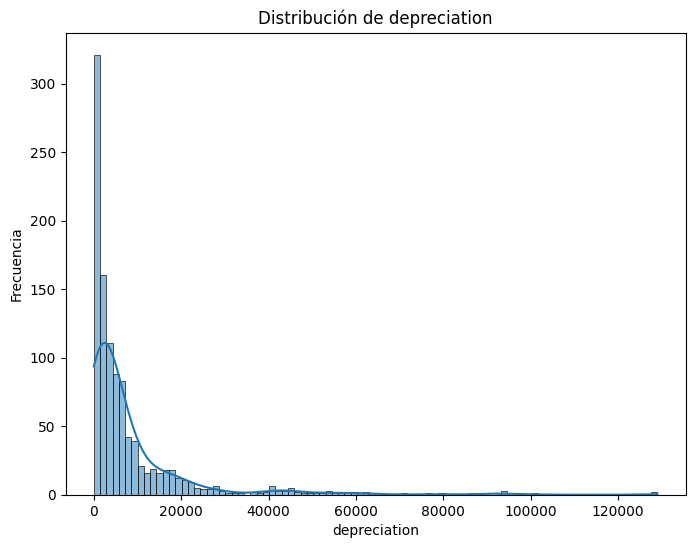

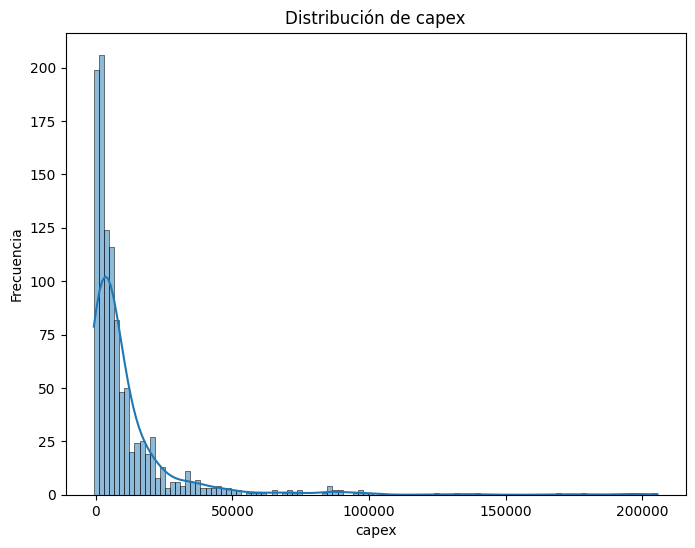

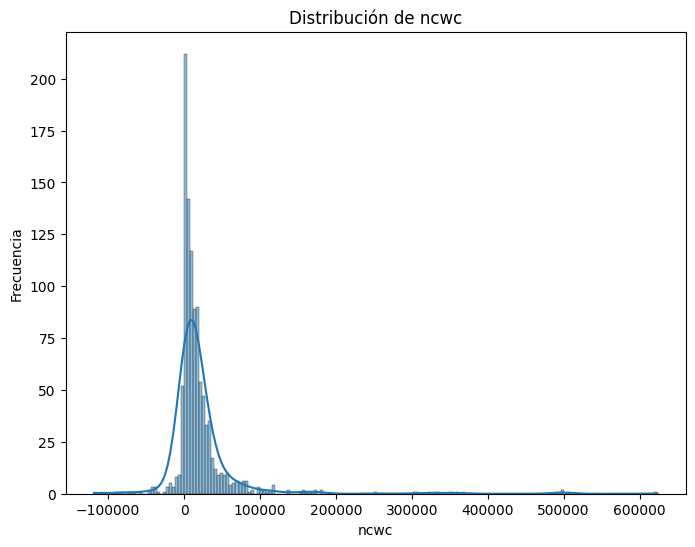

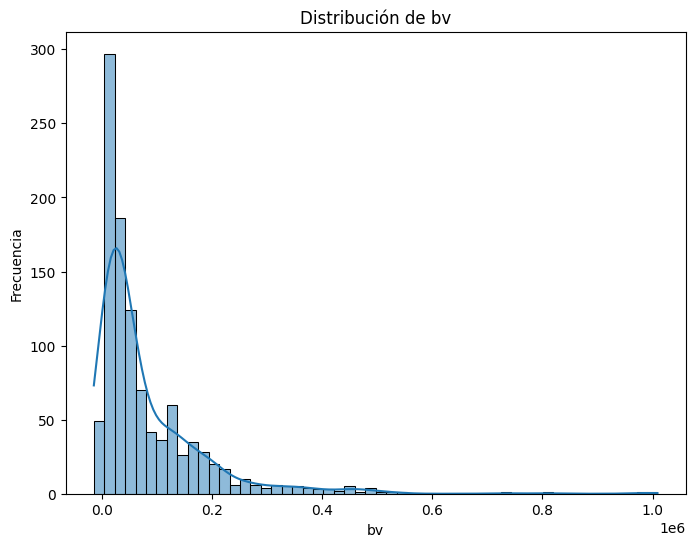

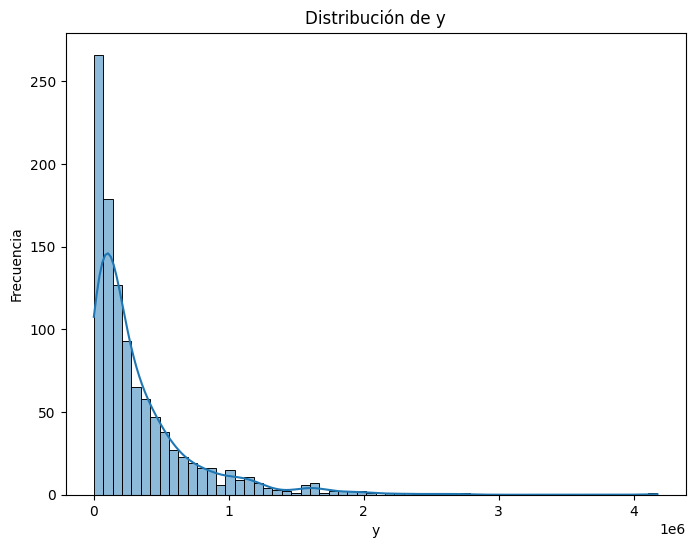

In [5]:
print(df.describe())

for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


### Preguntas de Reflexión (Exploración)
1. ¿Qué tipo de problema estás intentando resolver al usar `y` como variable objetivo?
2. ¿Notas valores atípicos (outliers) en alguna de las variables? ¿Cómo podría afectar a la regresión lineal?
3. ¿Crees que la columna `valuationdate` podría aportar información para predecir `y`, o la excluirías del análisis?

_Responde con tu razonamiento propio aquí._

## Paso 2: Preparación y Limpieza de Datos

1. **Manejo de valores faltantes**.
2. **Posible eliminación** o **imputación** de outliers.
3. **Transformaciones** (escalado, log, etc.) si son necesarias.

In [6]:
df.dropna(inplace=True)

for col in df.columns:
    if df[col].dtype != 'object':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

numerical_cols = [col for col in df.columns if df[col].dtype != 'object' and col != 'y' and col != 'valuationdate']

scaler = preprocessing.MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.describe())

         revenues        ebit  depreciation       capex        ncwc  \
count  657.000000  657.000000    657.000000  657.000000  657.000000   
mean     0.194179    0.302628      0.185400    0.273898    0.355963   
std      0.176283    0.171958      0.173455    0.209899    0.202280   
min      0.000000    0.000000      0.000000    0.000000    0.000000   
25%      0.065368    0.186119      0.052797    0.111431    0.190896   
50%      0.139212    0.240852      0.133841    0.199697    0.300331   
75%      0.281097    0.366995      0.273554    0.385441    0.470907   
max      1.000000    1.000000      1.000000    1.000000    1.000000   

               bv              y  
count  657.000000     657.000000  
mean     0.327812  123153.474453  
std      0.192086  102955.966608  
min      0.000000     369.200000  
25%      0.178932   44816.600000  
50%      0.280202   90048.263420  
75%      0.437380  177150.500000  
max      1.000000  425827.300000  


### Pregunta de Reflexión (Limpieza)
¿Por qué es relevante tratar valores faltantes y/o outliers **antes** de entrenar el modelo de regresión lineal?

_Responde con tu razonamiento aquí._

## Paso 4: Selección de Variables e Implementación del Modelo

1. **Seleccionar** cuáles columnas usarás como variables explicativas (features). Puede que uses todas o hagas una selección.
2. **Asignar** `X` (features) y `y` (variable objetivo).
3. **Dividir** en conjunto de entrenamiento (train) y conjunto de prueba (test).

In [7]:
features = ['revenues', 'ebit', 'depreciation', 'capex', 'ncwc', 'bv']
X = df[features]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Preguntas de Reflexión (Selección de Variables)
1. ¿Por qué es importante separar los datos en train y test?
2. ¿Qué pasaría si entrenas y evalúas en el **mismo** conjunto de datos?

_Responde con tu razonamiento._

## Paso 5: Entrenar el Modelo de Regresión Lineal
Usaremos la clase `LinearRegression` de scikit-learn.

In [8]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

### Interpretación de Coeficientes
Si la lista de features es `["revenues", "ebit", "depreciation", "capex", "ncwc", "bv"]` y tu `model.coef_` es algo como `[a, b, c, d, e, f]`, entonces:

\[ y \approx \beta_0 + a\cdot revenues + b\cdot ebit + c\cdot depreciation + d\cdot capex + e\cdot ncwc + f\cdot bv \]

Cada coeficiente indica cómo cambia `y` en promedio **por cada unidad** que se incrementa la variable (manteniendo las demás constantes).

In [9]:
coefficients = model.coef_

feature_names = features

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

revenues: 2788.077903851042
ebit: 383751.0407590952
depreciation: -14738.060227686947
capex: -55283.66198883718
ncwc: 20462.119116309826
bv: 224724.8682067086


## Paso 6: Evaluación y Validación del Modelo
Usaremos las siguientes métricas:
- **MSE (Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R² (Coeficiente de Determinación)**

In [11]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 2451454626.4658303
MAE: 33951.34918496893
R²: 0.750329747643131


### Preguntas de Reflexión (Evaluación)
1. ¿Por qué comparamos las métricas en **Entrenamiento** vs **Prueba**?
2. ¿Qué significa si el error en entrenamiento es **muy** distinto (mucho menor o mucho mayor) que en prueba?
3. ¿Cómo interpretar un **R²** cercano a 1, cercano a 0 o incluso negativo?

_Responde con tu razonamiento._

### Pregunta de Reflexión (Residuos)
Si observas un patrón claro en la gráfica de residuos (por ejemplo, forma de U), ¿qué podría indicar respecto a las **asunciones** de la regresión lineal?

_Responde con tu razonamiento._

## Paso 8: Interpretación y Conclusiones

1. **Revisa** los coeficientes: ¿son consistentes con la lógica de negocio? (p.ej., si `ebit` aumenta, esperas que `y` aumente o disminuya?).
2. **Observa** el nivel de error y R²: ¿el modelo es suficientemente bueno para su uso práctico?
3. **Considera** la posibilidad de:
   - Añadir más variables.
   - Aplicar **regresiones polinómicas** (X², X³) si sospechas no linealidad.
   - Usar **regularización** (Ridge, Lasso) si hay multicolinealidad o se requieren coeficientes más estables.

### Preguntas de Reflexión Final
1. ¿Crees que la Regresión Lineal Simple/Múltiple **captura adecuadamente** las relaciones en tus datos?
2. ¿Qué otras técnicas (ej. árboles de decisión, bosques aleatorios, etc.) considerarías para comparar resultados?
3. ¿El dataset es suficientemente grande y variado para hacer conclusiones robustas?

_Responde con tu razonamiento._

In [12]:
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")
    if feature == 'ebit':
        if coef > 0:
            print("Un aumento en ebit se asocia con un aumento en y, consistente con la lógica de negocio.")
        else:
            print("Un aumento en ebit se asocia con una disminución en y, inconsistente con la lógica de negocio. Revisar.")

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

if r2 < 0.5:
    print("El valor de R² es bajo, indicando que el modelo no explica bien la variabilidad de los datos. Considerar mejoras.")
    print("Posibles mejoras:")
    print("- Añadir más variables predictoras.")
    print("- Aplicar transformaciones a las variables (p.ej., logaritmo).")
    print("- Probar regresiones polinómicas para capturar no linealidades.")
    print("- Usar regularización (Ridge, Lasso) si hay multicolinealidad.")
elif r2 < 0.8:
  print("El valor de R² es moderado. Se podrían considerar las mejoras mencionadas anteriormente.")
else:
    print("El valor de R² es alto, lo cual indica que el modelo explica buena parte de la variabilidad de los datos.")

revenues: 2788.077903851042
ebit: 383751.0407590952
Un aumento en ebit se asocia con un aumento en y, consistente con la lógica de negocio.
depreciation: -14738.060227686947
capex: -55283.66198883718
ncwc: 20462.119116309826
bv: 224724.8682067086
MSE: 2451454626.4658303
MAE: 33951.34918496893
R²: 0.750329747643131
El valor de R² es moderado. Se podrían considerar las mejoras mencionadas anteriormente.


## Resumen
En este Notebook hemos:
1. **Explorado** los datos (EDA) y detectado posibles outliers.
2. **Limpieza** de datos y transformaciones opcionales.
3. **Seleccionado** variables y dividido en train/test.
4. **Entrenado** un modelo de Regresión Lineal.
5. **Evaluado** con MSE, MAE, R² y analizado residuos.
6. **Reflexionado** sobre los coeficientes y conclusiones.

¡Has completado un **análisis de regresión lineal** de forma integral! Para afianzar, puedes:
- Ajustar parámetros (aunque la regresión lineal simple en sklearn no tiene muchos).
- Comparar con otros modelos.
- Realizar validación cruzada en lugar de una simple división train/test.

¡Éxitos en tu proyecto de análisis!